<a href="https://colab.research.google.com/github/IshaGarg1103/endtoendml/blob/main/end2endml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#--STEPS--

#0. Preprocess + EDA + Feature selection
#1. Extract input and output cols
#2. scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/ model selection
#6. Deploy the model

In [ ]:
df = pd.read_csv("/content/placement.csv")
df #lets you read the original data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
#0. preprocessing of the data(removing excess or unnecessary cols.)
df = df.iloc[:,1:] #lets you select rows and colums using their positions.
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
#EDA(exploratory data analysis - getting to know your dataset)
import matplotlib.pyplot as plt

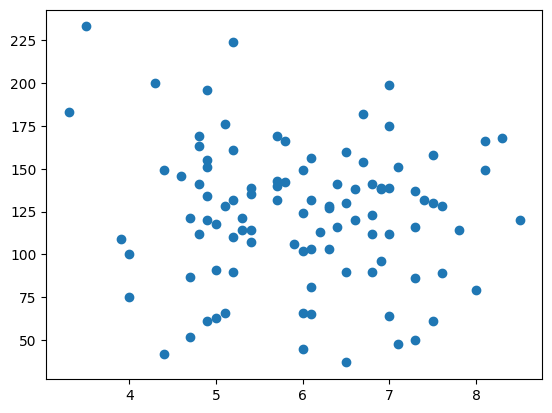

In [ ]:
plt.scatter(df['cgpa'],df['iq'])

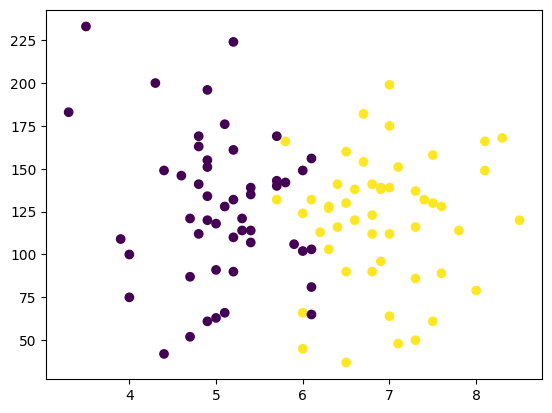

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c= df['placement'])

In [ ]:
#1. extract input and output cols.
x = df.iloc[:,0:2]

In [ ]:
y = df.iloc[:,-1]

In [ ]:
x #matrix of cgpa and iq

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y #vector of 1-d tensor considering only placement

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#3. train the split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
14,6.1,103.0
66,6.9,96.0
65,8.1,166.0
32,7.0,139.0
80,4.9,196.0
...,...,...
82,6.5,37.0
72,7.3,116.0
70,6.3,127.0
86,5.1,128.0


In [ ]:
y_test

,placement
43,1
64,1
25,0
77,1
76,0
92,0
9,0
53,1
83,1
17,0


In [ ]:
#2. scaling the values
from sklearn.preprocessing import StandardScaler #StandardScale is used to scale your data so that all features are on a similar scale.

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train= scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 0.10464211, -0.54857623],
       [ 0.83612094, -0.72764515],
       [ 1.93333917,  1.06304408],
       [ 0.92755579,  0.37234967],
       [-0.99257613,  1.83048233],
       [-1.81548981, -0.62532005],
       [ 1.20186035, -0.9834579 ],
       [ 0.10464211,  0.80723134],
       [-0.99257613,  0.24444329],
       [-0.53540186, -0.44625113],
       [ 0.74468608, -0.31834475],
       [-1.17544584, -0.95787662],
       [-0.16966245,  1.06304408],
       [ 0.92755579,  1.90722615],
       [-0.71827157,  0.93513771],
       [-0.2610973 ,  0.39793094],
       [-1.4497504 , -2.10903399],
       [ 1.20186035,  0.32118712],
       [ 0.10464211, -1.11136427],
       [ 0.56181638, -0.11369455],
       [ 0.37894667, -0.21601965],
       [-1.08401098,  0.98630026],
       [ 1.38473006, -1.62298977],
       [-0.90114128, -1.57182722],
       [-1.26688069,  0.55141859],
       [-1.81548981, -1.26485192],
       [-2.27266407,  2.77698949],
       [ 0.01320726, -2.03229016],
       [-0.62683672,

In [ ]:
x_test = scaler.transform(x_test)
x_test

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[  6.8, 141. ],
       [  7. ,  64. ],
       [  5. ,  91. ],
       [  7.3,  50. ],
       [  4.9, 155. ],
       [  5.2, 110. ],
       [  5.1,  66. ],
       [  8.3, 168. ],
       [  7.5, 130. ],
       [  3.3, 183. ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#model_training
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#evaluate the model
y_pred = clf.predict(x_test)

In [ ]:
y_test

,placement
43,1
64,1
25,0
77,1
76,0
92,0
9,0
53,1
83,1
17,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.6

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

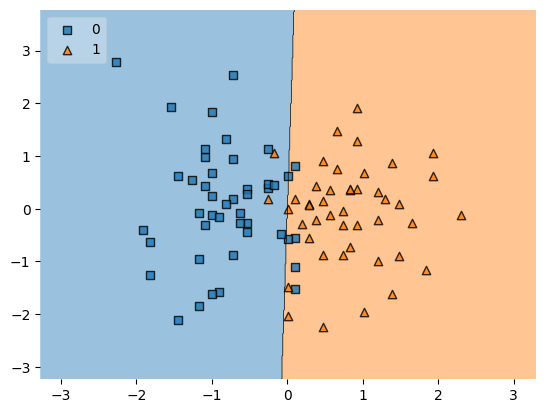

In [ ]:
plot_decision_regions(x_train,y_train.values,clf=clf, legend=2)

In [ ]:
import pickle #converts obj into file.

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))